<a href="https://colab.research.google.com/github/hentiamenty/FFNN_start/blob/main/Recognizing_wines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Frameworks loading
from tensorflow.keras.models import Sequential      
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization 
from tensorflow.keras import utils    
from tensorflow.keras.optimizers import Adam  
import numpy as np    
import matplotlib.pyplot as plt    
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_wine                     
%matplotlib inline

In [2]:
# Dataset loading
x_data = load_wine()['data']
y_data = load_wine()['target']        

print('Dimension x_data -', x_data.shape)
print('Dimention y_data -', y_data.shape)
print()

print('First wine data:',x_data[0])
print('Wine class:',y_data[0])

Dimension x_data - (178, 13)
Dimention y_data - (178,)

First wine data: [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
Wine class: 0


In [3]:
# One hot encoding transformation
y_data = utils.to_categorical(y_data, 3)
# Dividing the set into general and test parts
x_all, x_test, y_all, y_test = train_test_split(x_data, y_data, test_size=0.1, shuffle=True, random_state = 6)
# Dividing the set into train and validation parts 
x_train, x_val, y_train, y_val = train_test_split(x_all, y_all, test_size=0.1, shuffle=True, random_state = 6)

print(x_train.shape)
print(y_train.shape)
print()
print(x_val.shape)
print(y_val.shape)

(144, 13)
(144, 3)

(16, 13)
(16, 3)


In [10]:
# Creating model
model = Sequential()
model.add(Dense(2600, input_dim=13, activation='relu'))

model.add(Dense (650,activation='relu'))

model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(learning_rate=0.002), 
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2600)              36400     
                                                                 
 dense_7 (Dense)             (None, 650)               1690650   
                                                                 
 dense_8 (Dense)             (None, 3)                 1953      
                                                                 
Total params: 1,729,003
Trainable params: 1,729,003
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
# model training
history = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data = (x_val, y_val), verbose=1)
scores = model.evaluate(x_val, y_val, verbose=1)
print('Percentage of correct answers on the validation data:', round(scores[1],2) * 100, '%')

Epoch 1/100
5/5 [==============================] - 1s 62ms/step - loss: 181.9933 - accuracy: 0.3681 - val_loss: 24.5421 - val_accuracy: 0.2500
Epoch 2/100
5/5 [==============================] - 0s 25ms/step - loss: 20.2874 - accuracy: 0.3333 - val_loss: 9.2948 - val_accuracy: 0.3750
Epoch 3/100
5/5 [==============================] - 0s 24ms/step - loss: 13.5412 - accuracy: 0.3056 - val_loss: 10.8634 - val_accuracy: 0.3125
Epoch 4/100
5/5 [==============================] - 0s 25ms/step - loss: 12.4714 - accuracy: 0.4653 - val_loss: 14.7758 - val_accuracy: 0.3750
Epoch 5/100
5/5 [==============================] - 0s 27ms/step - loss: 7.1909 - accuracy: 0.4236 - val_loss: 7.6734 - val_accuracy: 0.3750
Epoch 6/100
5/5 [==============================] - 0s 25ms/step - loss: 5.4158 - accuracy: 0.4444 - val_loss: 7.9964 - val_accuracy: 0.5625
Epoch 7/100
5/5 [==============================] - 0s 25ms/step - loss: 4.8013 - accuracy: 0.6250 - val_loss: 1.4293 - val_accuracy: 0.7500
Epoch 8/100


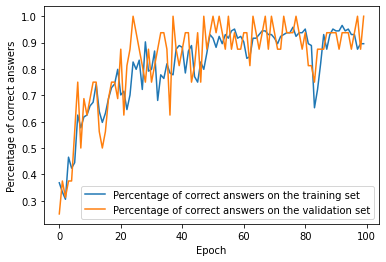

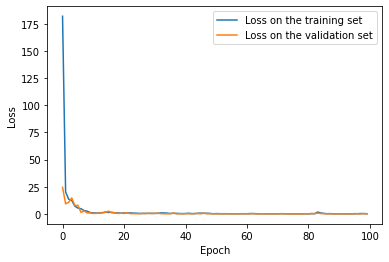

In [12]:
# Traning visualization
plt.plot(history.history['accuracy'], 
         label='Percentage of correct answers on the training set')
plt.plot(history.history['val_accuracy'], 
         label='Percentage of correct answers on the validation set')
plt.xlabel('Epoch')
plt.ylabel('Percentage of correct answers')
plt.legend()
plt.show()
plt.plot(history.history['loss'], 
         label='Loss on the training set')
plt.plot(history.history['val_loss'], 
         label='Loss on the validation set')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
# Save model
model.save_weights('model.h5')
model.load_weights('model.h5')

In [18]:
# Testing
y_pred = model.predict(x_test)
# loss
from sklearn import metrics
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Prediction
predictions = np.argmax(y_pred, axis=1)
y_test_nums = np.argmax(y_test, axis=1)
for i in range(len(x_test)):
    print(f'predicted - {predictions[i]}, correct answers {y_test_nums[i]}, {predictions[i] == y_test_nums[i]}')
print(f'\n Percentage of correct answers - {(predictions == y_test_nums).mean()*100} %')

Root Mean Squared Error (RMSE): 0.19093962
predicted - 0, correct answers 0, True
predicted - 1, correct answers 1, True
predicted - 1, correct answers 1, True
predicted - 1, correct answers 1, True
predicted - 0, correct answers 0, True
predicted - 0, correct answers 0, True
predicted - 1, correct answers 1, True
predicted - 1, correct answers 1, True
predicted - 1, correct answers 1, True
predicted - 0, correct answers 0, True
predicted - 0, correct answers 0, True
predicted - 1, correct answers 1, True
predicted - 2, correct answers 2, True
predicted - 1, correct answers 0, False
predicted - 1, correct answers 1, True
predicted - 0, correct answers 0, True
predicted - 0, correct answers 0, True
predicted - 0, correct answers 0, True

 Percentage of correct answers - 94.44444444444444 %


Root Mean Squared Error (RMSE): 0.19093962
predicted - 0, correct answers 0, True
predicted - 1, correct answers 1, True
predicted - 1, correct answers 1, True
predicted - 1, correct answers 1, True
predicted - 0, correct answers 0, True
predicted - 0, correct answers 0, True
predicted - 1, correct answers 1, True
predicted - 1, correct answers 1, True
predicted - 1, correct answers 1, True
predicted - 0, correct answers 0, True
predicted - 0, correct answers 0, True
predicted - 1, correct answers 1, True
predicted - 2, correct answers 2, True
predicted - 1, correct answers 0, False
predicted - 1, correct answers 1, True
predicted - 0, correct answers 0, True
predicted - 0, correct answers 0, True
predicted - 0, correct answers 0, True

 Percentage of correct answers - 94.44444444444444 %


# Новый раздел

# Новый раздел